In [1]:
from rerf.urerf import UnsupervisedRandomForest
from sklearn.datasets import make_classification
from sklearn.datasets.samples_generator import make_blobs
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
n_samples=100
n_classes=2
# X, y = make_classification(
#     n_samples=n_samples,
#     n_features=4,
#     n_informative=2,
#     n_redundant=0,
#     random_state=0,
#     n_classes=n_classes,
#     shuffle=False,
# )
X,y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=2**4)

In [3]:
clf = UnsupervisedRandomForest(n_estimators=10, max_depth=None, random_state=0)

In [4]:
clf.fit(X)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_parent=1, n_estimators=10,
                         n_jobs=None, projection_matrix='RerF', random_state=0)

In [5]:
sim_mat = clf.transform()

In [6]:
i = [ ij[0] for ij in sim_mat.keys()]
j = [ ij[1] for ij in sim_mat.keys()]
A = csc_matrix((list(sim_mat.values()), (i, j))).toarray()
clustering = AgglomerativeClustering(n_clusters=n_classes).fit(A)

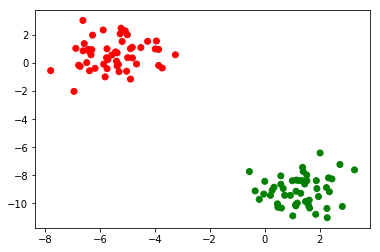

In [8]:
cols = 'rgb'
plt.scatter(X[:,0], X[:,1], c=[cols[i] for i in y])

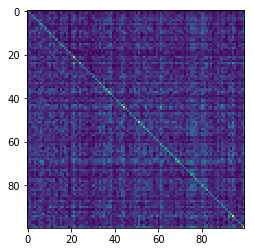

In [9]:
plt.imshow(A)

In [14]:
yisort = np.argsort(clustering.labels_)
B = A[yisort,:]
C = B[:,yisort]

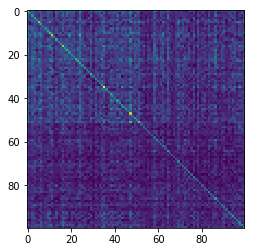

In [15]:
plt.imshow(C)

In [21]:
sum([abs(yl - yi) for yl, yi in zip(clustering.labels_, y)])/n_samples

0.48